In [90]:
import meep as mp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
from numpy.fft import fft, ifft, fftfreq

In [186]:
##

resolution = 50                # pixels/um
dpml = 1.0                      # PML thickness
sz = 16 + 2*dpml
cell_size = mp.Vector3(z=sz)
pml_layers = [mp.PML(dpml)]

dimensions = 1
tsim = 1000
courant = 0.5 
dt = courant  / resolution
Nt = int(tsim/dt + 1)
tslice = np.linspace(0, tsim, Nt)

##
omegal = 2 * np.pi / Nt * np.linspace(0,Nt-1,Nt) 
ml = np.random.normal(0,1,Nt)
nl = np.random.normal(0,1,Nt)

In [187]:
##
eps0 = 8.854187e-12
hbar = 1.05457182e-34
c = 2.99792458e8
kb = 1.380649e-23
deltap = np.sqrt(1/3/eps0/hbar/c)*kb
tausim=7e-12
def Dnsqr(omega,T):
    x = np.abs(omega/T)
    if x ==0 :
        output = 0 ## Taylor expansion
    else:
        tmp = np.abs(omega) / (np.exp(hbar*np.abs(omega)/kb/T)-1) 
        output = 6 *hbar**2/np.pi/T/kb**2  * tmp
        
    
    output = np.sqrt(output)
    return output

tempe = 3
dlsqr = np.empty(Nt)

for i in range(Nt):
     dlsqr[i] = Dnsqr(omegal[i],tempe) 

fc =(ml + 1j * nl) * dlsqr## Fourier component from Eq. 6        
    
## use fft to generate signal
ts1 = time.time()

  

Ef = ifft(fc)

te1 = time.time()



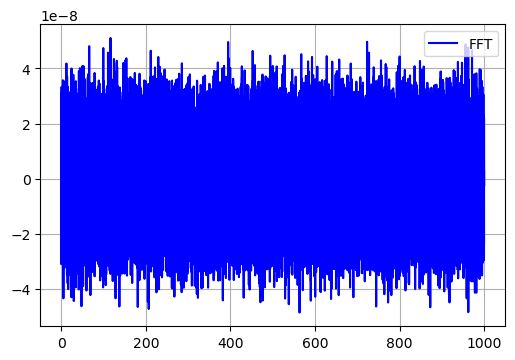

using FFT 2.7164146900177
prediction by complexity: Nt /log2(Nt) = 6020.654889830512


In [192]:
##
fig = plt.figure(dpi=100)
plt.plot(tslice,np.real(Ef),'b',label = 'FFT')
#plt.xlim(0,2)
#plt.ylim(-0.008,0.008)
plt.legend()
plt.grid()
plt.show()

print('using FFT', te1-ts1)
print('prediction by complexity: Nt /log2(Nt) =', Nt/np.log2(Nt)) 

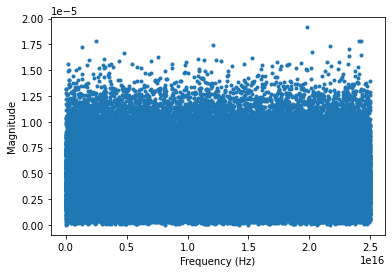

In [193]:
dft = np.fft.fft(Ef)

# Compute the frequencies associated with each DFT coefficient
freqs = np.linspace(0,25*1e15,100001)

# Plot the results
import matplotlib.pyplot as plt
plt.plot(freqs,abs(dft),'.')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()